# EDA PROJECT ON WEEKLY SALES

## Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

## Import the data from the system

In [2]:
walmart=pd.read_csv("D:\\python\\EDA_Project\\walmart-sales-dataset-of-45stores.csv")

In [3]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unnamed: 8
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106,NaN
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106,NaN
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,NaN
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,NaN
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106,NaN
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,NaN
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667,NaN
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667,NaN
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,NaN


## Insights of the data

In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Unnamed: 8    0 non-null      float64
dtypes: float64(6), int64(2), object(1)
memory usage: 452.6+ KB


In [5]:
np.shape(walmart)

(6435, 9)

In [6]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Unnamed: 8      float64
dtype: object

## Data cleaning

In [7]:
walmart.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Unnamed: 8      6435
dtype: int64

In [8]:
# Remove the null rows and columns

walmart.dropna(how="all",axis=1,inplace=True)

### There is one null column found, which we removed from our data.

In [9]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
walmart.drop_duplicates(inplace=True)

### Deleted the duplicate values permanently if there is any exist.

### There are some error in date column which needs to be fixed before starting our analysis.

In [11]:
walmart["Date"]=walmart["Date"].str.replace("-","/")

In [12]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19/10/2012,718125.53,0,56.47,3.969,192.330854,8.667


## summarize the data

In [13]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Exploratory Data Analysis

## 1. Holiday_Flag

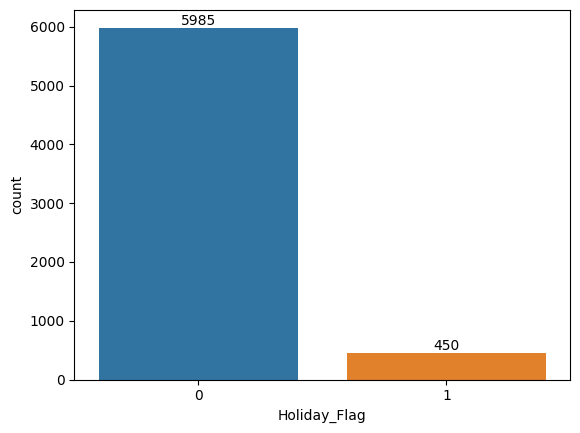

In [14]:
# Holiday_Flag refers to the total numbers of a holidays ,where zero refers to NO HOLIDAY and 1 refers to HOLIDAY.

gen=sb.countplot(x="Holiday_Flag",data=walmart)
gen.bar_label(gen.containers[0])
mp.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


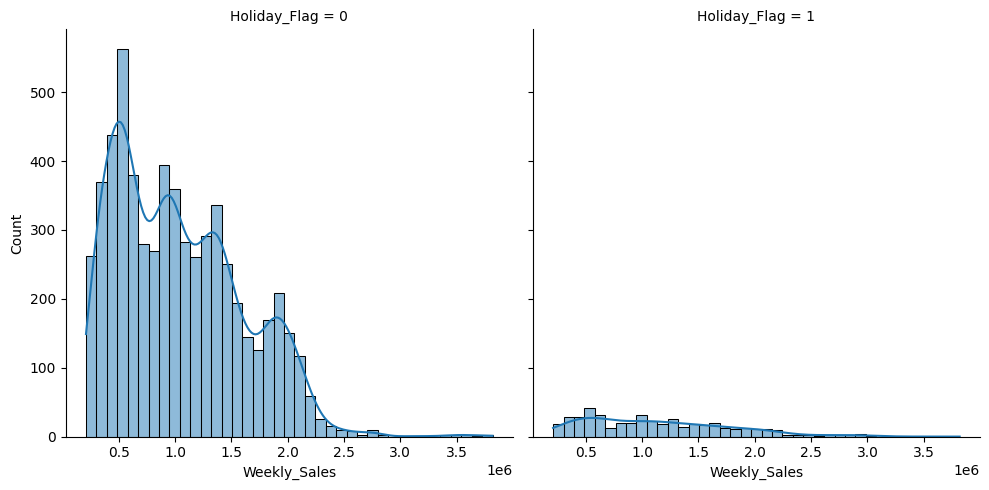

In [15]:
# Analyze the Weekly sales on holidays.

sb.displot(data=walmart, x="Weekly_Sales", col="Holiday_Flag", kde=True)
mp.show()

### Clearly Weekly sales shows a steep fall during the Holidays.

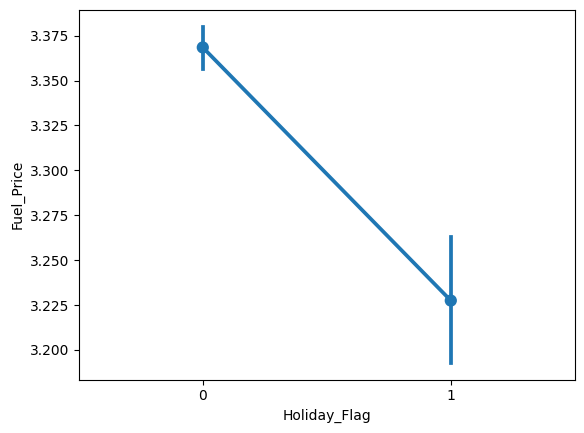

In [16]:
# Fuel prices in holidays. Here fuel price is taken according to the consumption required for stores.

sb.pointplot(data=walmart,x="Holiday_Flag",y="Fuel_Price")
mp.show()

### Fuel prices are relatively Higher on Non-Holidays as compared to Holidays.

## 2. STORE

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


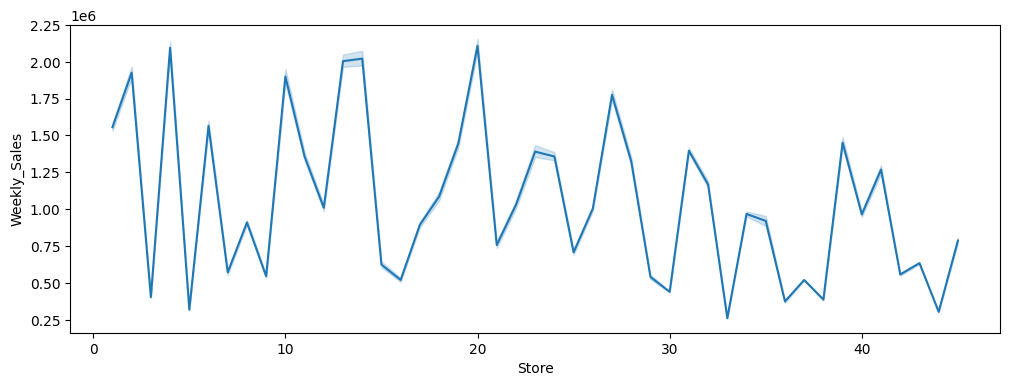

In [17]:
# Weekly sales against the store

mp.figure(figsize=(12,4))
sb.lineplot(x="Store",y="Weekly_Sales",data=walmart)
mp.show()

### With the help of pointplot we analyzed that Stores preceding the 27th Store did better in sales than Stores succeding the 27th Store.

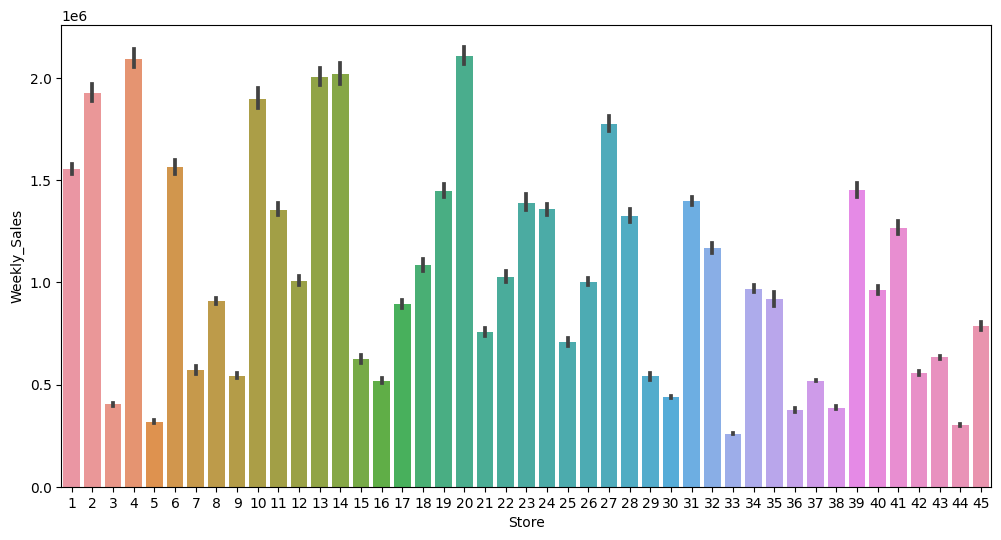

In [18]:
# Check for Stores with Highest and Lowest Weekly sales

mp.figure(figsize=(12,6))
sb.barplot(x="Store", y="Weekly_Sales", data=walmart)
mp.show()

### Through barplot we can tell that 4th and 20th Store did the highest sales and the 33rd Store did the lowest sales throughout the given period.

## 3. TEMPERATURE

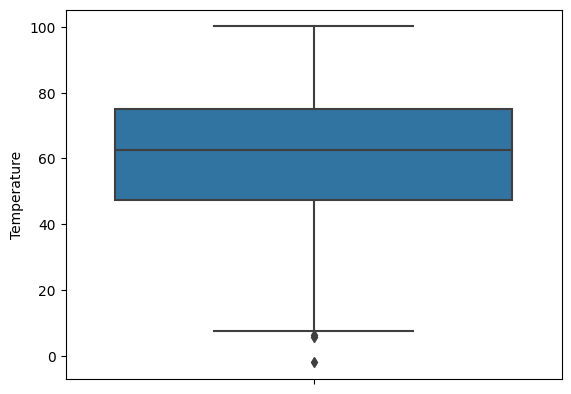

In [19]:
# check for Cumulative Temperature of all the Stores.

sb.boxplot(y="Temperature",data=walmart)
mp.show()

### There are some outliers But other than that major Temperature lies between 45 to 75.

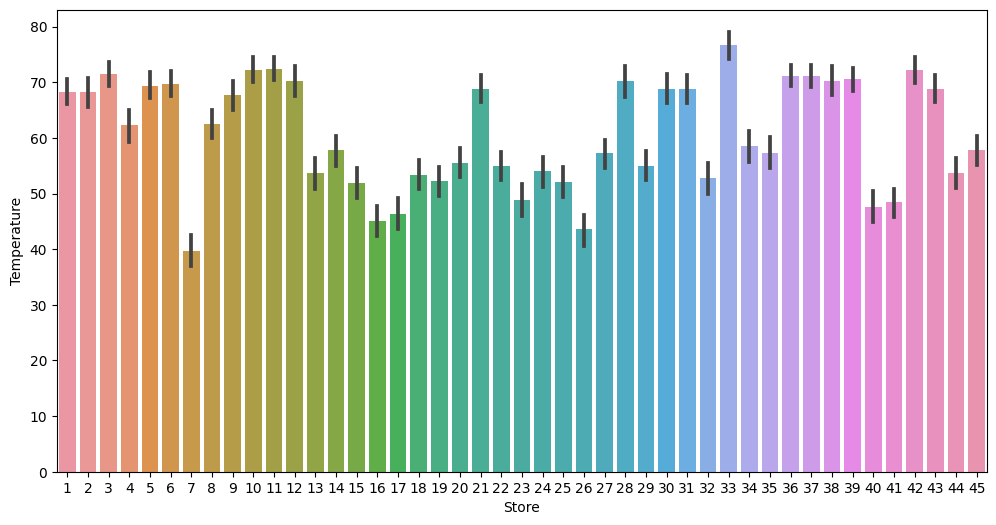

In [20]:
# Average Temperature(Footfalls) in each Stores.

mp.figure(figsize=(12,6))
sb.barplot(x="Store", y="Temperature", data=walmart)
mp.show()

### Maximum footfall is in 33rd Store, Despite getting the maximum footfall it performs the least in Weekly Sales.
### May be the Quality is compromised in this store or the prices are High in comparision with other stores.

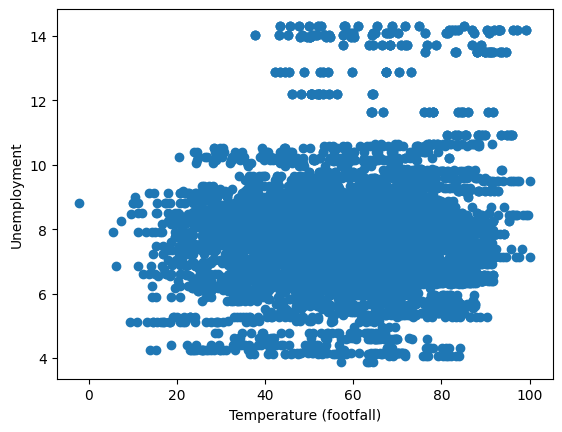

In [21]:
# Relation between Unemployment and Temperature(footfall)

mp.scatter(data=walmart,x="Temperature",y="Unemployment")
mp.xlabel("Temperature (footfall)")
mp.ylabel("Unemployment")
mp.show()

### As the Unemployment rate increases, the Temperature in the stores decreases quite significantly.
### Reason being, people cut down their expenses when they are running low in funds. 

## 4. CPI

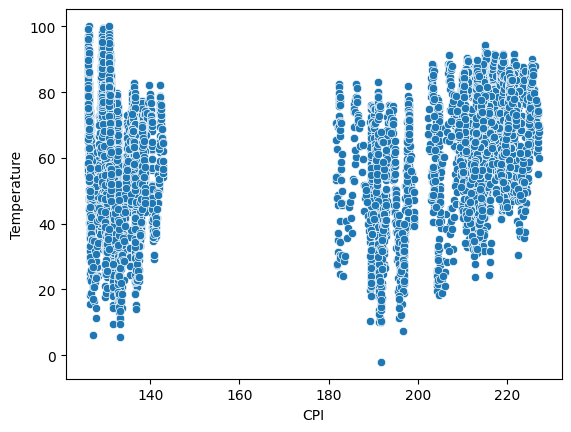

In [22]:
# CPI refers to the change of price of an item over the period of time.

sb.scatterplot(data=walmart,x="CPI",y="Temperature")
mp.show()

### As the CPI increases the Temperature(footfall in a Store) Slightly Decreases.

## 5. Unemployment

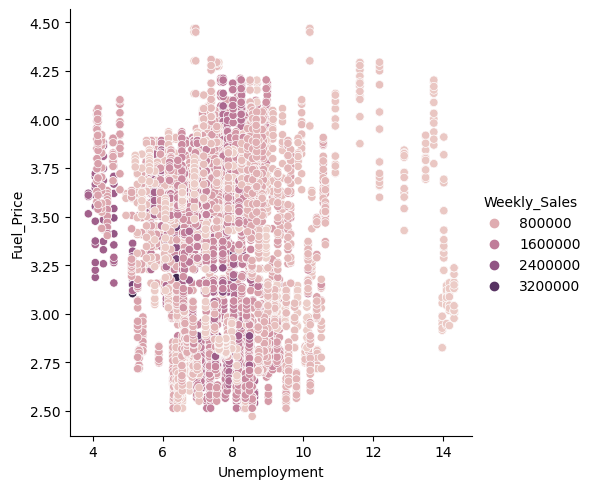

In [23]:
# Effect on Weekly Sales due to Unemployment and Fuel prices

sb.relplot(data=walmart,x="Unemployment",y="Fuel_Price",hue="Weekly_Sales")
mp.show()

### With low Unemployment rate and low Fuel prices Weekly Sales performed better than any other scenarios.

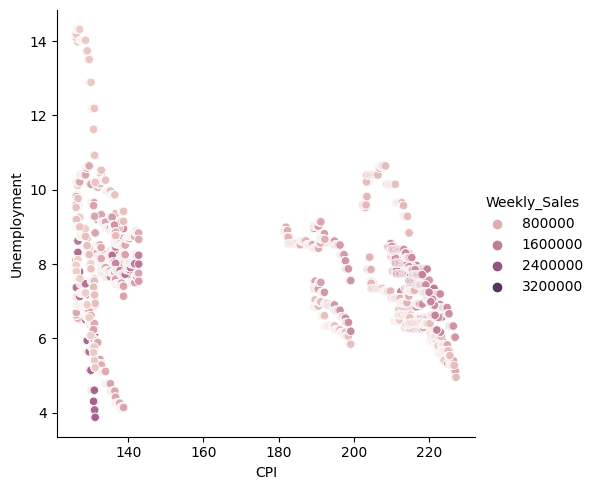

In [24]:
# Effect on Weekly Sales due to Unemployment and CPI

sb.relplot(data=walmart, x="CPI", y="Unemployment",hue="Weekly_Sales")
mp.show()

# CONCLUSION :

###    After analyzing we can conclude that :
### 1. Weekly Sales depends upon Unemployment and CPI , with slightly higher dependency on Unemployment rate 
### 2. The higher the Unemployment and CPI rate the lower the Weekly Sales 
### 3. With Unemployment rate high and CPI low , Weekly Sales gets little bit better
### 4. With Unemployment rate low but CPI is high , Weekly Sales is relatively high
### 5. With both Unemployment and CPI rates are low , Weekly Sales is the Maximum.